# ======================== 06-1 군집 알고리즘 ========================


*   타깃을 모르는 비지도 학습
*   항목 추가



---
layout: single
title:  "CHAPTER 06 군집 알고리즘" 
categories: AI
---

In [15]:
# 해당 링크로부터 데이터 파일 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


fruits 배열 크기 확인(샘플 수, 높이, 넓이) : (300, 100, 100)
fruits[:, 0, 0] Sample 300개 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 2 1 1 1 3 1
 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1]
fruits[0, :, 0] 높이 100 px 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1
 6 1 2 3 1 2 3 1 1 1 2 2 2 5 2 2 5 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
fruits[0, 0, :] 넓이 100 px 
 [  1   1   1   1   1   1   1   1   1   1   1   1   1

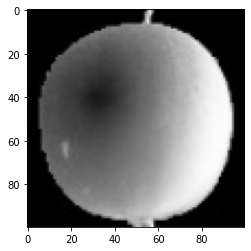



fruits배열 첫번째행 이미지 출력, cmap=gray_r


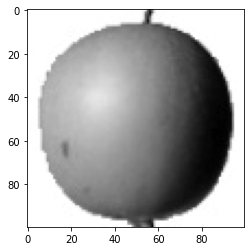



바나나, 파인애플 이미지 출력


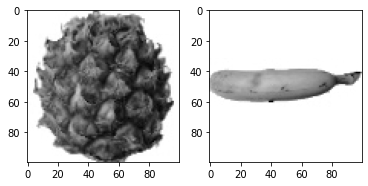



픽셀값 분석
fruits 데이터를 사과, 파인애플, 바나나로 각각 나누기
apple: (100, 10000) ,  pineapple: (100, 10000) ,   banana: (100, 10000)


사과 샘플 100개에 대한 픽셀 평균값
 [ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  9

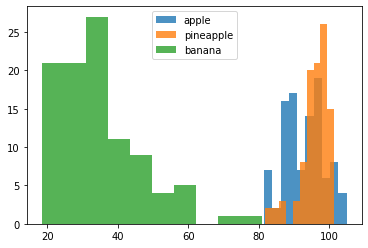



100X00픽셀에 대한 평균값 막대그래프


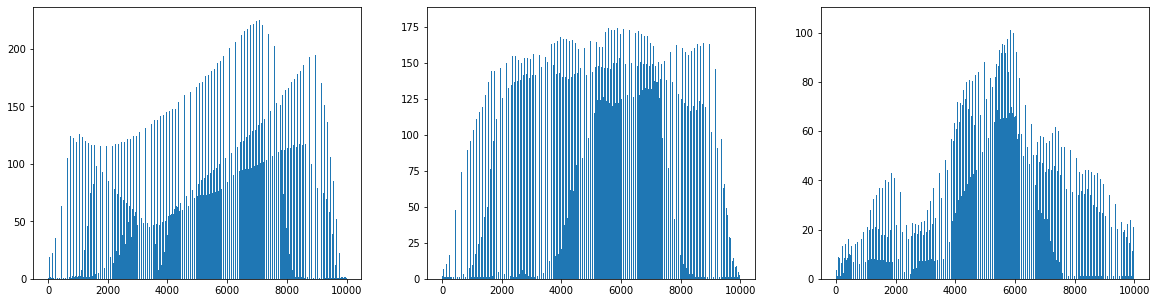



픽셀을 평균 낸 이미지


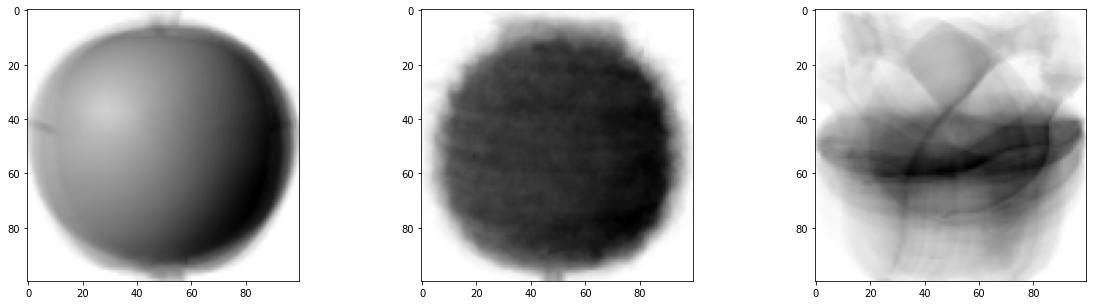



평균값과 가까운 사진 고르기
각 샘플의 오차평균 : (300,)


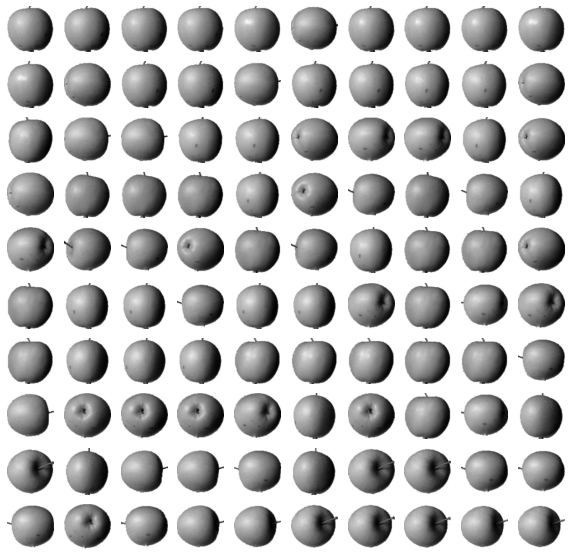

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Data Load
fruits = np.load('fruits_300.npy')
print("fruits 배열 크기 확인(샘플 수, 높이, 넓이) :",fruits.shape)
print("fruits[:, 0, 0] Sample 300개 \n",fruits[:, 0, 0])
print("fruits[0, :, 0] 높이 100 px \n",fruits[0, :, 0])
print("fruits[0, 0, :] 넓이 100 px \n",fruits[0, 0, :])

print("\n\nfruits 첫번째 배열 TEST 출력, cmap=gray")
plt.imshow(fruits[0], cmap='gray')  # 배경에 집중
plt.show()

print("\n\nfruits배열 첫번째행 이미지 출력, cmap=gray_r")
plt.imshow(fruits[0], cmap='gray_r')# 반전
plt.show()

print("\n\n바나나, 파인애플 이미지 출력")
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

print("\n\n픽셀값 분석")
print("fruits 데이터를 사과, 파인애플, 바나나로 각각 나누기")
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print("apple:",apple.shape,",  pineapple:",pineapple.shape, ",   banana:",banana.shape)

print("\n\n사과 샘플 100개에 대한 픽셀 평균값\n",apple.mean(axis=1))

print("\n\n각 과일 히스토그램")
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

print("\n\n100X00픽셀에 대한 평균값 막대그래프")
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

print("\n\n픽셀을 평균 낸 이미지")
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
apple_banana = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(apple_banana, cmap='gray_r')
plt.show()

print("\n\n평균값과 가까운 사진 고르기")
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print("각 샘플의 오차평균 :",abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# ======================== 06-2 k - 평균 알고리즘 ========================


1.   무작위로 k개의 클러스터 중심을 정함
2.   각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3.   클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4.   클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복


In [17]:
# 해당 링크로부터 데이터 파일 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


 ***** [KMeans 클래스] ***** 
# Data Load
fruits 배열 크기 확인(샘플 수, 높이, 넓이) : (300, 100, 100)
k-평균 모델훈련을 위한 3차원 배열(샘플개수, 너비, 높이)을 2차원배열(샘플개수, 너비*높이)로 변경
fruits_2d 배열 크기 확인(샘플개수, 너비*높이) : (300, 10000)


# 클러스터 개수 3으로 지정 후 학습 진행
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


레이블 0,1,2로 모은 샘플의 개수 확인
 (array([0, 1, 2]), array([111,  98,  91], dtype=int64))


레이블이 0인 과일 사진


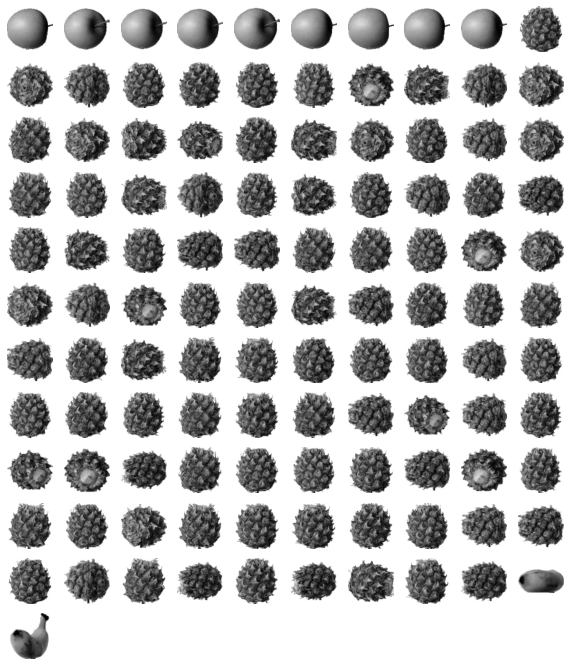



레이블이 1인 과일 사진


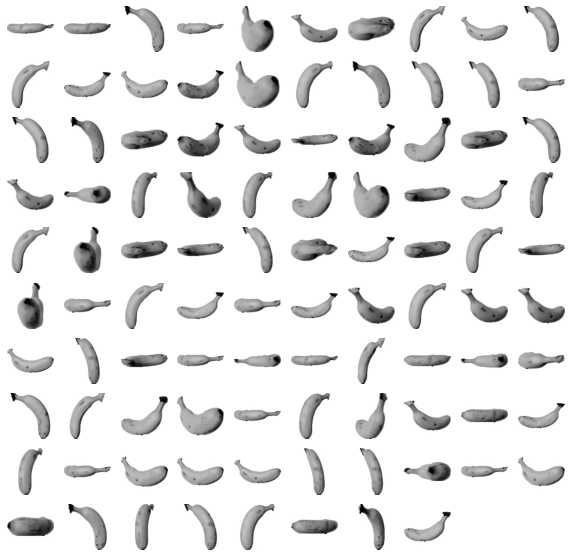



레이블이 2인 과일 사진


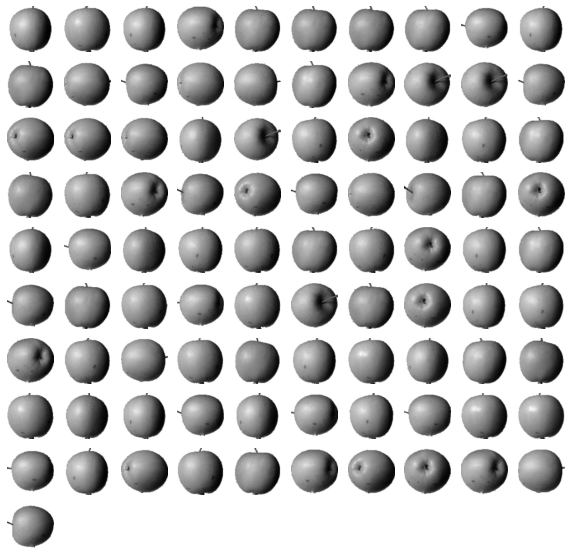

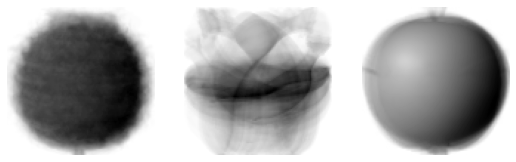



샘플에서 중심까지의 거리(클러스터) :  [[3393.8136117  8837.37750892 5267.70439881]]


샘플fruits_2d[100:101]이 어느 레이블에 속하는지 예측 : 
 [0]


샘플 이미지로 확인



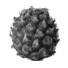



 4


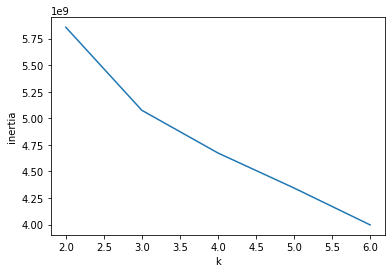

In [18]:
print(" ***** [KMeans 클래스] ***** ")

import numpy as np

print("# Data Load")
fruits = np.load('fruits_300.npy')
print("fruits 배열 크기 확인(샘플 수, 높이, 넓이) :",fruits.shape)

print("k-평균 모델훈련을 위한 3차원 배열(샘플개수, 너비, 높이)을 2차원배열(샘플개수, 너비*높이)로 변경")
fruits_2d = fruits.reshape(-1, 100*100)
print("fruits_2d 배열 크기 확인(샘플개수, 너비*높이) :",fruits_2d.shape)

print("\n\n# 클러스터 개수 3으로 지정 후 학습 진행")
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

print("\n\n레이블 0,1,2로 모은 샘플의 개수 확인\n",np.unique(km.labels_, return_counts=True))

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    # 한줄에 10개씩 이미지를 그림, 샘플개수/10 = 행 개수
    rows = int(np.ceil(n/10))
    # 행이 한개일 때 : 열의개수 = 샘플개수
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n :
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

print("\n\n레이블이 0인 과일 사진")
draw_fruits(fruits[km.labels_==0])
print("\n\n레이블이 1인 과일 사진")
draw_fruits(fruits[km.labels_==1])
print("\n\n레이블이 2인 과일 사진")
draw_fruits(fruits[km.labels_==2])


draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

print("\n\n샘플에서 중심까지의 거리(클러스터) : ",km.transform(fruits_2d[100:101]))
print("\n\n샘플fruits_2d[100:101]이 어느 레이블에 속하는지 예측 : \n",km.predict(fruits_2d[100:101]))
print("\n\n샘플 이미지로 확인\n")
draw_fruits(fruits[100:101])
print("\n\n",km.n_iter_)


inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# ======================== 06-3 주성분 분석(PCA) ========================


1.   주성분 분석 : 차원축소 알고리즘


In [19]:
# 해당 링크로부터 데이터 파일 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


# Data Load


fruits np배열 크기 확인(샘플 수, 높이, 넓이) :
 (300, 100, 100)


3차원 배열(샘플개수, 너비, 높이)을 2차원배열(샘플개수, 너비*높이)로 변경


fruits_2d 배열 크기 확인(샘플개수, 너비*높이) :
 (300, 10000)


주성분 분석 알고리즘 진행, n_components=50


pca의 크기 : (50, 10000)


pca를 이미지로 그리기



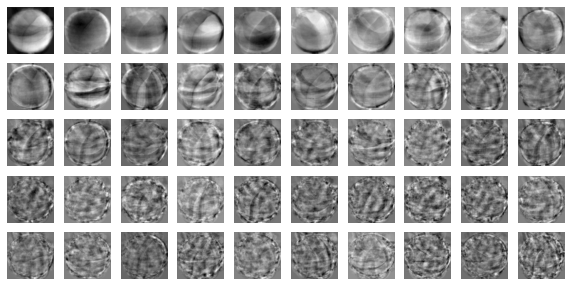



fruits_2d의 형태 : (300, 10000)


fruits_2d의 형태 변환


fruits_pca의 형태 (300, 50)


원본 데이터 재구성, 복원
(300, 10000)


 100x100 크기로 변환 후 100개씩 나눠 출력



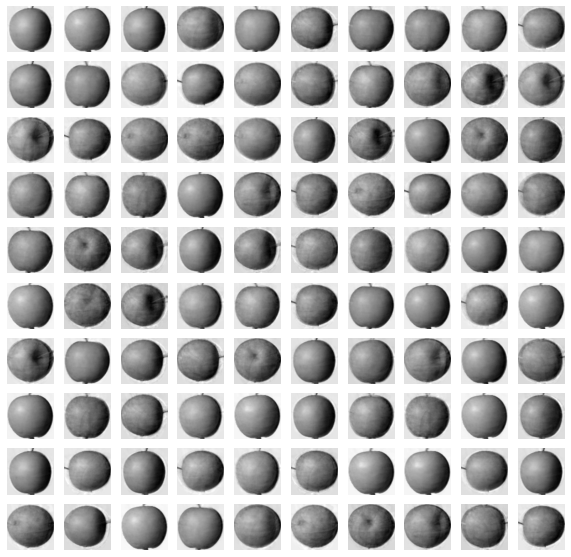

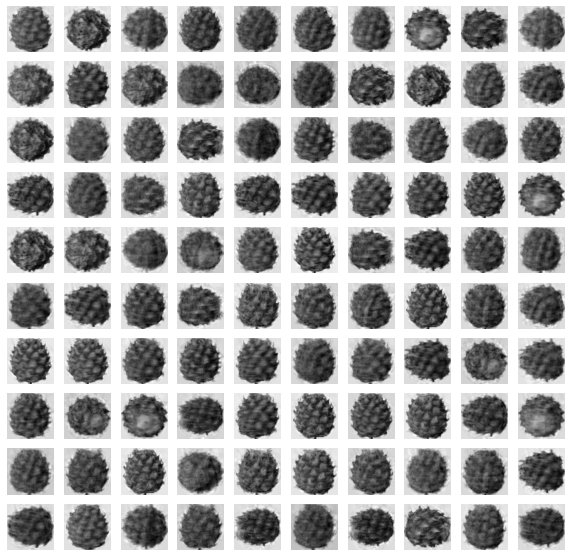

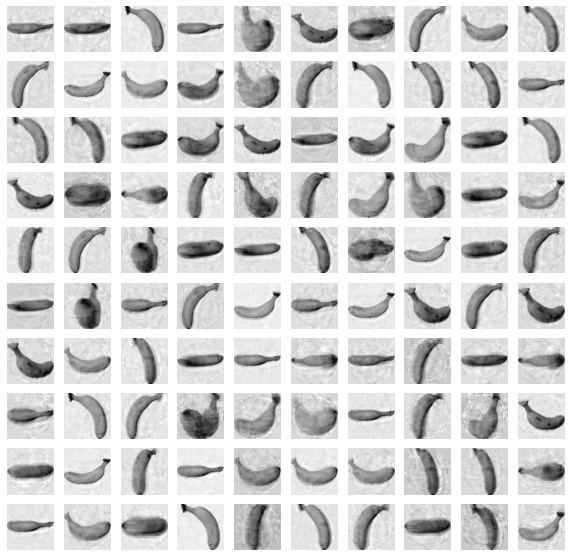





 총 분산 비율 : 0.9215119065807617


설명된 분산의 비율을 그래프로 출력


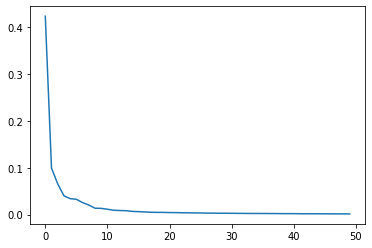



다른 알고리즘과 함께 사용하기


로지스틱 회귀 모델


target 값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


교차검증점수


 차원 수 10000개
예측 정확도 :  0.9966666666666667
훈련된 시간 :  0.743205451965332


 차원 수 50개
예측 정확도 :  1.0
훈련된 시간 :  0.0353999137878418


n_components=0.5 - 설명된 분산의 비율 50%
 50%정도를 설명할 수 있는 주성분의 개수 구하기
50%정도를 설명할 수 있는 주성분의 개수 :  2 개만 있으면 50%의 분산을 설명할 수 있다.


pca로 원본객체 변환


fruits_pca의 형태 (300, 2)  주성분이 2개이므로 각각 300개의 샘플이 2개의 특성만 갖고있다


C:\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

예측 정확도 :  0.9933333333333334
훈련된 시간 :  0.07880134582519531


군집과 함께 사용하기
 (array([0, 1, 2]), array([110,  99,  91], dtype=int64))


시각화


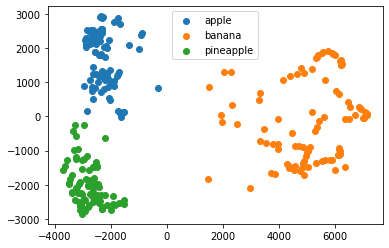

In [20]:
import numpy as np

print("# Data Load")
fruits = np.load('fruits_300.npy')

print("\n\nfruits np배열 크기 확인(샘플 수, 높이, 넓이) :\n",fruits.shape)

print("\n\n3차원 배열(샘플개수, 너비, 높이)을 2차원배열(샘플개수, 너비*높이)로 변경")
fruits_2d = fruits.reshape(-1, 100*100)

print("\n\nfruits_2d 배열 크기 확인(샘플개수, 너비*높이) :\n",fruits_2d.shape)

print("\n\n주성분 분석 알고리즘 진행, n_components=50")
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print("\n\npca의 크기 :",pca.components_.shape)

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    # 한줄에 10개씩 이미지를 그림, 샘플개수/10 = 행 개수
    rows = int(np.ceil(n/10))
    # 행이 한개일 때 : 열의개수 = 샘플개수
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n :
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

print("\n\npca를 이미지로 그리기\n")
draw_fruits(pca.components_.reshape(-1,100,100))


print("\n\nfruits_2d의 형태 :",fruits_2d.shape)

print("\n\nfruits_2d의 형태 변환")
fruits_pca = pca.transform(fruits_2d)
print("\n\nfruits_pca의 형태",fruits_pca.shape)

print("\n\n원본 데이터 재구성, 복원")
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

print("\n\n 100x100 크기로 변환 후 100개씩 나눠 출력\n")
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

print("\n\n 총 분산 비율 :",np.sum(pca.explained_variance_ratio_))

print("\n\n설명된 분산의 비율을 그래프로 출력")
plt.plot(pca.explained_variance_ratio_)
plt.show()

print("\n\n다른 알고리즘과 함께 사용하기")

print("\n\n로지스틱 회귀 모델")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)
print("\n\ntarget 값 : ",target)

print("\n\n교차검증점수")
from sklearn.model_selection import cross_validate

print("\n\n 차원 수 10000개")
scores = cross_validate(lr, fruits_2d, target)
print("예측 정확도 : ",np.mean(scores['test_score']))
print("훈련된 시간 : ",np.mean(scores['fit_time']))

print("\n\n 차원 수 50개")
scores = cross_validate(lr, fruits_pca, target)
print("예측 정확도 : ",np.mean(scores['test_score']))
print("훈련된 시간 : ",np.mean(scores['fit_time']))


print("\n\nn_components=0.5 - 설명된 분산의 비율 50%\n 50%정도를 설명할 수 있는 주성분의 개수 구하기")
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print("50%정도를 설명할 수 있는 주성분의 개수 : ",pca.n_components_,"개만 있으면 50%의 분산을 설명할 수 있다.")

print("\n\npca로 원본객체 변환")
fruits_pca = pca.transform(fruits_2d)
print("\n\nfruits_pca의 형태",fruits_pca.shape," 주성분이 2개이므로 각각 300개의 샘플이 2개의 특성만 갖고있다")

scores = cross_validate(lr, fruits_pca, target)
print("예측 정확도 : ",np.mean(scores['test_score']))
print("훈련된 시간 : ",np.mean(scores['fit_time']))


print("\n\n군집과 함께 사용하기")
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print("",np.unique(km.labels_, return_counts=True))

print("\n\n시각화")
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana', 'pineapple'])
plt.show()